# Sentiment Analysis & Topic Modeling of Insurance Reviews

### Prepared by :Sophie Tong

### Date: Feb 14, 2024

####Dataset:https://www.kaggle.com/datasets/ghrabmed/reviews-about-insurance-companies/data


# Project Overview

**Data Overview:**
- Dataset: Insurance company reviews from Kaggle .
- Structure: 44934 rows and 4 columns. Each entry contains a review text and additional metadata.

**Objectives:**
1. **Sentiment Analysis:** Classify reviews as positive, negative, or neutral to gauge customer satisfaction levels.
2. **Topic Modeling:** Extract underlying themes/topics from reviews to identify key areas of concern or satisfaction.
3. **Sentiment Distribution Exploration:** Analyze sentiment trends across different topics to prioritize improvement areas.
4. **Insights and Recommendations:** Offer actionable recommendations based on sentiment and topics to enhance customer experiences and retention.

**Methodology:**
1. **Data Preprocessing:**
   - Clean text data: Remove noise, punctuation, and stopwords.
   - Tokenize and lemmatize/stem words.
2. **Sentiment Analysis:**
   - Apply sentiment analysis techniques (e.g., VADER) to classify reviews.
3. **Topic Modeling (LDA):**
   - Train an LDA model to extract topics from preprocessed text data.
   - Analyze top words for each topic to interpret themes.
4. **Sentiment Distribution Analysis:**
   - Calculate sentiment distribution within each topic.
   - Visualize sentiment trends across topics.


**Findings:**
- Identified sentiment trends: Positive, negative, or neutral sentiment prevalence.
- Extracted topics: Identified underlying themes such as customer service, pricing, claims process, etc.
- Analyzed sentiment distribution by topic: Revealed sentiment tendencies within each topic.

**Recommendations:**
- Improve customer service: Address issues highlighted in negative sentiment reviews.
- Enhance product offerings: Based on topics identified, improve products/services to meet customer needs.
- Optimize marketing strategies: Tailor marketing efforts based on sentiment and topic insights to resonate with customers.


# Import Necessary Libraries

In [ ]:
pip install vaderSentiment


In [ ]:
!pip install nltk

In [ ]:
# import libraries
# use base env
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob, os

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.util import ngrams

import re
from collections import Counter


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from gensim import corpora, models
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# pip install spacy
# python -m spacy download en_core_web_sm

import spacy
from spacy import displacy
import en_core_web_sm
nlp = en_core_web_sm.load()

# Get Data from Kaggle

In [ ]:
pip install kaggle

In [ ]:
import os
import subprocess

In [ ]:
# Mount Google Drive to access the notebook
from google.colab import drive
drive.mount('/content/drive')

# Import the notebook containing the code using %run magic command
%run '/content/drive/My Drive/Colab Notebooks/kaggle_downloader.ipynb'

# Now you can call the function defined in the imported notebook
download_kaggle_dataset("ghrabmed/reviews-about-insurance-companies")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Saving kaggle.json to kaggle.json
reviews-about-insurance-companies.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# List the contents of the current working directory
!ls -l

total 11772
drwx------ 5 root root    4096 Feb 22 22:28  drive
-rw-r--r-- 1 root root 9375955 Feb 22 22:40 'Final Data.csv'
-rw-r--r-- 1 root root 2664885 Aug  6  2021  reviews-about-insurance-companies.zip
drwxr-xr-x 1 root root    4096 Feb 21 14:21  sample_data


In [ ]:
import zipfile

# Specify the file paths for the zip archive and the CSV file within it
zip_file_path = "reviews-about-insurance-companies.zip"
csv_file_path_within_zip = "Final Data.csv"

# Extract the CSV file from the zip archive
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extract(csv_file_path_within_zip, path=".")

# Read CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_path_within_zip)

# Show the first few rows of the DataFrame
print(df.head())

   Unnamed: 0      Customer Name Customer Location  \
0           0    Sarah Hoelscher                US   
1           1      Bruce Winslow                CR   
2           2      Kelly Wilmeth                US   
3           3  Stephanie LeBlanc                US   
4           4                JPD                US   

                                         Review Text  
0                  Easy to use and understand! Qu...  
1                  It was a real pleasure to spea...  
2                  Byron Preston was super helpfu...  
3                  Byron Preston was amazing walk...  
4                  Thanks Josh, top rate service ...  


In [ ]:
df.shape

(44934, 4)

In [ ]:
df.columns

Index(['Unnamed: 0', 'Customer Name', 'Customer Location', 'Review Text'], dtype='object')

In [ ]:
# Drop the column 'Unnamed: 0'
df = df.drop('Unnamed: 0', axis=1)

# Show the first few rows of the DataFrame
print(df.head())

       Customer Name Customer Location  \
0    Sarah Hoelscher                US   
1      Bruce Winslow                CR   
2      Kelly Wilmeth                US   
3  Stephanie LeBlanc                US   
4                JPD                US   

                                         Review Text  
0                  Easy to use and understand! Qu...  
1                  It was a real pleasure to spea...  
2                  Byron Preston was super helpfu...  
3                  Byron Preston was amazing walk...  
4                  Thanks Josh, top rate service ...  


In [ ]:
#Overview of Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44934 entries, 0 to 44933
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Customer Name      44934 non-null  object
 1   Customer Location  44934 non-null  object
 2   Review Text        44934 non-null  object
dtypes: object(3)
memory usage: 1.0+ MB


In [ ]:
#check the null values
df.isnull().sum()

Customer Name        0
Customer Location    0
Review Text          0
dtype: int64

# Data Preprocessing

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# Process data

# remove non-alphanumeric characters
df['review'] = [re.sub('[^a-zA-Z0-9_]', ' ', str(i)) for i in df['Review Text']]

# convert to lowercase
df['review'] = [i.lower() for i in df['review']]

# perform the tokenization
df['tokens'] = [word_tokenize(i) for i in df['review']]

# remove stopwords
stop_words = list(stopwords.words('english'))
stop_words = [i for i in stop_words if i!='not']
df['words'] = [[i for i in j if not i in stop_words] for j in df['tokens']]

# lemmatize each word
lem = WordNetLemmatizer()
df['words'] = [[lem.lemmatize(i) for i in j] for j in df['words']]

#Creating 2-grams and 3-grams to better understand
df['2gram'] = [list(ngrams(i, 2)) for i in df['words']]

df['3gram'] = [list(ngrams(i, 3)) for i in df['words']]

# Find topics with LDA

In [ ]:
# implement the LDA x

# Create token lists
list_of_list_of_tokens = list(df.words)
# Create dictionary
dictionary_LDA = corpora.Dictionary(list_of_list_of_tokens)
# Filter extremes
dictionary_LDA.filter_extremes(no_below=3)
# Generate bag-of-words representation
corpus = [dictionary_LDA.doc2bow(list_of_tokens) for list_of_tokens in list_of_list_of_tokens]

# Set number of topics
num_topics = 5

# Train LDA model
%time lda_model = models.LdaModel(corpus, num_topics=num_topics, random_state=1, \
                                  id2word=dictionary_LDA, \
                                  passes=10, alpha=[0.01]*num_topics, \
                                  eta=[0.01]*len(dictionary_LDA.keys()))

# Print top words for each topic
for i, topic in lda_model.show_topics(formatted=True, num_topics=num_topics, num_words=10):
    print(str(i)+": "+ topic)
    print()

# Calculate topic distribution for each document
probs = [lda_model[corpus[i]] for i in list(range(len(df)))]

# Extract dominant topic for each document
topic = [max(i, key=lambda x: x[1])[0] for i in probs]

# Add 'topic' column to DataFrame
df['topic'] = topic


CPU times: user 2min, sys: 1.31 s, total: 2min 1s
Wall time: 2min 6s
0: 0.028*"not" + 0.014*"policy" + 0.014*"time" + 0.013*"get" + 0.012*"call" + 0.009*"email" + 0.009*"would" + 0.009*"car" + 0.008*"one" + 0.008*"called"

1: 0.123*"service" + 0.068*"customer" + 0.063*"great" + 0.041*"excellent" + 0.020*"good" + 0.018*"thank" + 0.018*"professional" + 0.017*"experience" + 0.016*"always" + 0.016*"company"

2: 0.050*"helpful" + 0.045*"question" + 0.022*"knowledgeable" + 0.019*"answered" + 0.016*"professional" + 0.016*"thank" + 0.015*"everything" + 0.014*"great" + 0.014*"help" + 0.013*"patient"

3: 0.058*"insurance" + 0.031*"recommend" + 0.027*"would" + 0.021*"company" + 0.021*"plan" + 0.020*"best" + 0.020*"need" + 0.018*"life" + 0.015*"policy" + 0.015*"highly"

4: 0.179*"easy" + 0.073*"process" + 0.036*"quick" + 0.034*"simple" + 0.028*"use" + 0.019*"made" + 0.019*"fast" + 0.017*"great" + 0.016*"policy" + 0.016*"application"



### Word Cloud for Each Topic

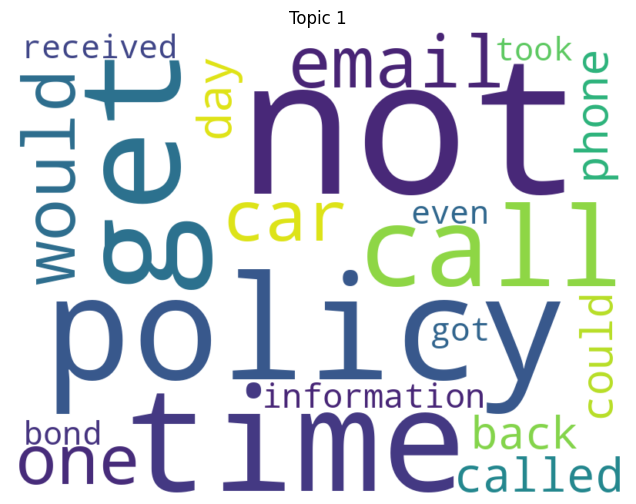

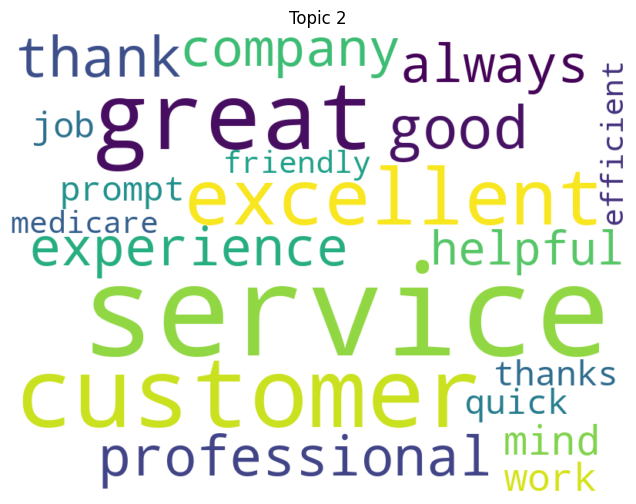

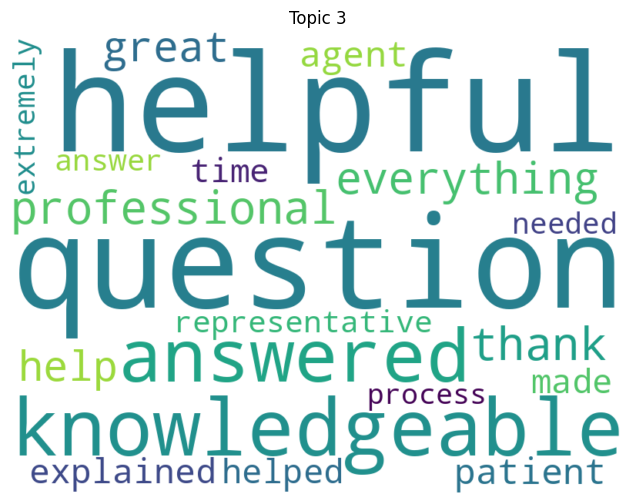

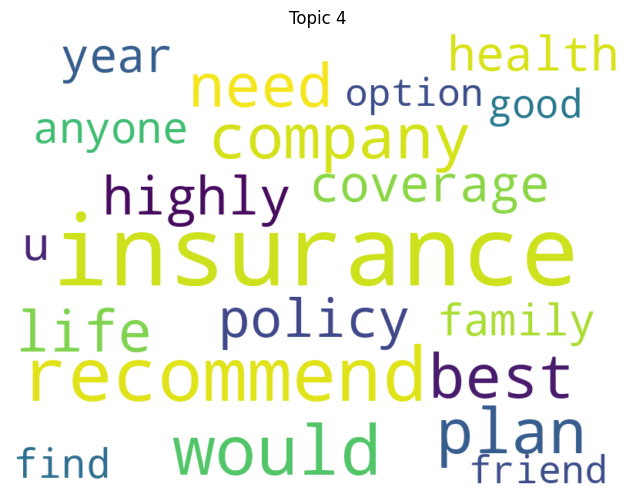

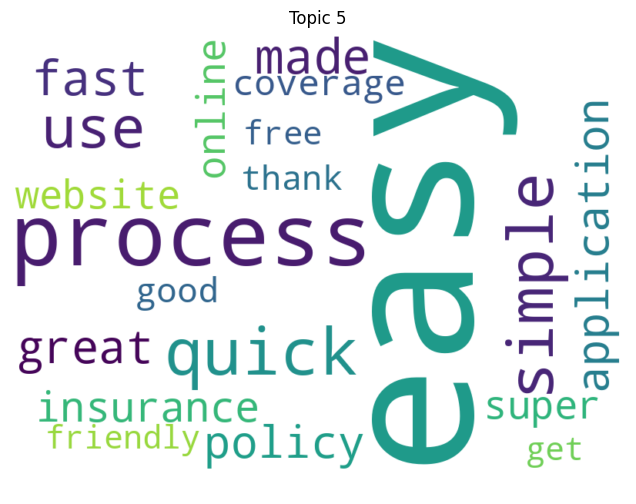

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word cloud for each topic
for i in range(num_topics):
    plt.figure(figsize=(8, 6))
    wordcloud = WordCloud(background_color='white', width=800, height=600).generate_from_frequencies(dict(lda_model.show_topic(i, topn=20)))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Topic {i+1}')
    plt.axis('off')
    plt.show()


### Topic Distribution


Topic Percentage:
2    24.889838
0    20.641385
4    19.128054
3    18.562781
1    16.777941
Name: topic, dtype: float64


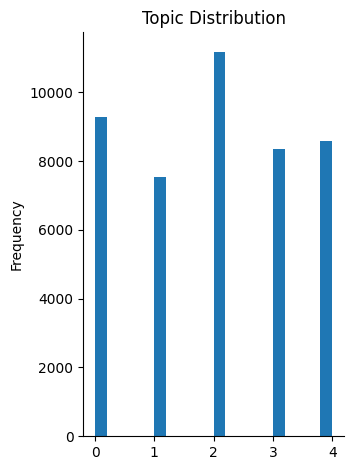

In [ ]:
# Calculate the percentage of each topic
topic_percentage = df['topic'].value_counts(normalize=True) * 100

print("\nTopic Percentage:")
print(topic_percentage)

# Plot the topic histogram
plt.subplot(1, 2, 2)
df['topic'].plot(kind='hist', bins=20, title='Topic Distribution')
plt.gca().spines[['top', 'right']].set_visible(False)

plt.tight_layout()
plt.show()


### Key Insight

1. Topic 0: Policy and Communication Concerns
   - Discussions about policy-related issues and communication challenges with the insurance company.

2. Topic 1: Positive Customer Service Experience
   - Positive feedback regarding the quality of customer service received.

3. Topic 2: Assistance and Knowledge
   - Positive interactions with knowledgeable staff and helpful responses to inquiries.

4. Topic 3: Recommendations and Best Plans
   - Discussions about recommendations for insurance plans and finding the best coverage options.

5. Topic 4: Ease of Process and Application
   - Positive feedback about the ease and simplicity of the insurance process and application.

The topic distribution shows that:
- Topic 2 (Assistance and Knowledge)has the highest percentage at 24.89%.
- Topic 0 (Policy and Communication Concerns)follows with 20.64%.
- Topic 4 (Ease of Process and Application)comprises 19.13%.
- Topic 3 (Recommendations and Best Plans)has 18.56%.
- Topic 1 (Positive Customer Service Experience)has the lowest percentage at 16.78%.

# Sentiment Analysis

In [ ]:
# Use VADER for sentiment

# Define a function to calculate sentiment scores
def sentiment_scores(sentence):
    m1 = SentimentIntensityAnalyzer()
    sentiment_dict = m1.polarity_scores(sentence)

    if sentiment_dict['compound'] >= 0.05 :
        return 1

    elif sentiment_dict['compound'] <= - 0.05 :
        return -1

    else:
        return 0
# Apply the sentiment_scores function to each review
df['sentiment'] = df.apply(lambda x: sentiment_scores(x.review), axis = 1)

# Print the count of sentiment labels
print(df.sentiment.value_counts())

# Display df with the new 'sentiment' column
df.head()


 1    40362
 0     2324
-1     2248
Name: sentiment, dtype: int64


,Customer Name,Customer Location,Review Text,review,tokens,words,2gram,3gram,topic,sentiment
0,Sarah Hoelscher,US,Easy to use and understand! Qu...,easy to use and understand qu...,"[easy, to, use, and, understand, quick, result...","[easy, use, understand, quick, result, afforda...","[(easy, use), (use, understand), (understand, ...","[(easy, use, understand), (use, understand, qu...",4,1
1,Bruce Winslow,CR,It was a real pleasure to spea...,it was a real pleasure to spea...,"[it, was, a, real, pleasure, to, speak, with, ...","[real, pleasure, speak, victoria, interesting,...","[(real, pleasure), (pleasure, speak), (speak, ...","[(real, pleasure, speak), (pleasure, speak, vi...",0,1
2,Kelly Wilmeth,US,Byron Preston was super helpfu...,byron preston was super helpfu...,"[byron, preston, was, super, helpful, in, expl...","[byron, preston, super, helpful, explaining, d...","[(byron, preston), (preston, super), (super, h...","[(byron, preston, super), (preston, super, hel...",0,1
3,Stephanie LeBlanc,US,Byron Preston was amazing walk...,byron preston was amazing walk...,"[byron, preston, was, amazing, walking, me, th...","[byron, preston, amazing, walking, exactly, ne...","[(byron, preston), (preston, amazing), (amazin...","[(byron, preston, amazing), (preston, amazing,...",2,1
4,JPD,US,"Thanks Josh, top rate service ...",thanks josh top rate service ...,"[thanks, josh, top, rate, service]","[thanks, josh, top, rate, service]","[(thanks, josh), (josh, top), (top, rate), (ra...","[(thanks, josh, top), (josh, top, rate), (top,...",1,1


### Sentiment Distribution

Sentiment Percentage:
 1    89.825077
 0     5.172030
-1     5.002893
Name: sentiment, dtype: float64


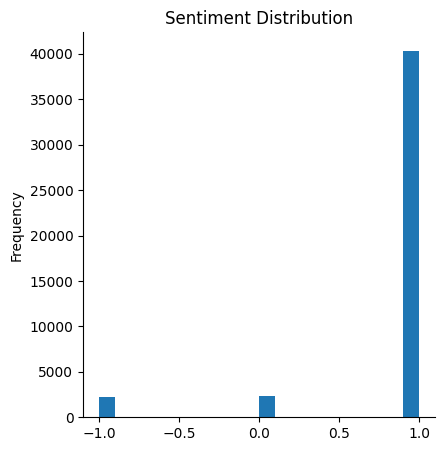

In [ ]:
# Calculate the percentage of each sentiment
sentiment_percentage = df['sentiment'].value_counts(normalize=True) * 100

# Print the percentages
print("Sentiment Percentage:")
print(sentiment_percentage)

# Plot the sentiment histogram
from matplotlib import pyplot as plt
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
df['sentiment'].plot(kind='hist', bins=20, title='Sentiment Distribution')
plt.gca().spines[['top', 'right']].set_visible(False)



The sentiment distribution shows that:
- 89.83% of the sentiments are positive (1).
- 5.17% of the sentiments are neutral (0).
- 5.00% of the sentiments are negative (-1).

### Sentiment distribution By Topic

Sentiment Distribution by Topic:
sentiment         -1         0          1
topic                                    
0          17.541779  8.797844  73.660377
1           1.100942  3.117124  95.781934
2           1.242847  5.060801  93.696352
3           3.476801  3.644647  92.878552
4           1.268179  4.688773  94.043048


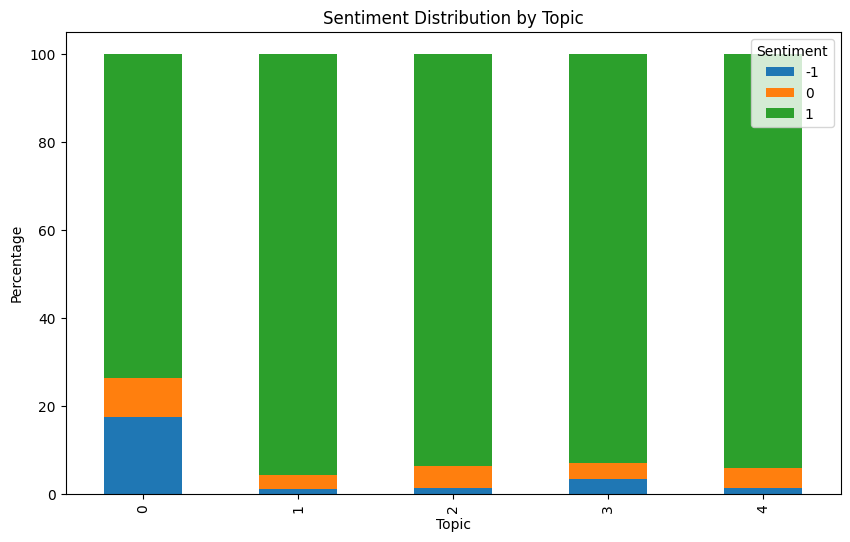

In [ ]:
# Group by topic and sentiment, then count occurrences
sentiment_distribution = df.groupby(['topic', 'sentiment']).size().unstack(fill_value=0)

# Normalize counts to get percentages
sentiment_distribution = sentiment_distribution.div(sentiment_distribution.sum(axis=1), axis=0) * 100

# Print sentiment distribution by topic
print("Sentiment Distribution by Topic:")
print(sentiment_distribution)

# Plot sentiment distribution by topic
sentiment_distribution.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Sentiment Distribution by Topic')
plt.xlabel('Topic')
plt.ylabel('Percentage')
plt.legend(title='Sentiment')
plt.show()


### Key Insight
Sentiment distribution varies across topics, with Topic 0 exhibiting the highest negative sentiment percentage at 17.54%. This topic primarily revolves around Policy and Communication Concerns.

**Actionable Steps:**
To address the dissatisfaction expressed within Topic 0, insurance companies should prioritize enhancing policy transparency, improving communication channels, soliciting customer feedback, providing training for customer service representatives, and implementing proactive issue resolution measures.

**Impact:**
By addressing negative sentiment in Topic 0, insurance companies can enhance customer experiences, improve satisfaction, and drive business success.

# TF-IDF

In [ ]:
# TF-IDF (keyword importance)

# Initialize TfidfVectorizer to compute TF-IDF scores
tfIdfVectorizer = TfidfVectorizer(use_idf=True)

# Convert tokenized words into text strings for each document
text = [' '.join(i) for i in df['words']]

# Compute TF-IDF scores for the text corpus
tfIdf = tfIdfVectorizer.fit_transform(text)

# Get feature names (words) from the TF-IDF vectorizer
tf_feature_names = tfIdfVectorizer.get_feature_names_out()

# Create a DataFrame to display TF-IDF scores for the first document
df2 = pd.DataFrame(tfIdf[0].T.todense(), index=tfIdfVectorizer.get_feature_names_out(), columns=["TF-IDF"])

# Sort the DataFrame by TF-IDF scores in descending order
df2 = df2.sort_values('TF-IDF', ascending=False)

# Display the top 10 words with highest TF-IDF scores
df2.head(10)


,TF-IDF
result,0.583782
affordable,0.446974
understand,0.423714
use,0.361359
quick,0.321770
easy,0.213926
00,0.000000
pester,0.000000
petal,0.000000
pet,0.000000


from matplotlib import pyplot as plt
_df_0['TF-IDF'].plot(kind='hist', bins=20, title='TF-IDF')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['TF-IDF'].plot(kind='line', figsize=(8, 4), title='TF-IDF')
plt.gca().spines[['top', 'right']].set_visible(False)

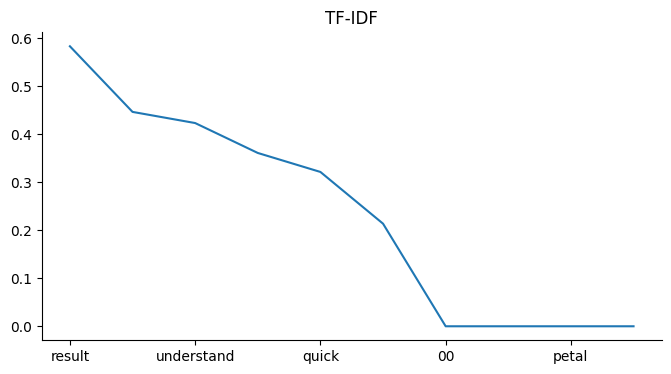

In [ ]:
from matplotlib import pyplot as plt
_df_1['TF-IDF'].plot(kind='line', figsize=(8, 4), title='TF-IDF')
plt.gca().spines[['top', 'right']].set_visible(False)

### Key Insight

Words like "result", "affordable", "understand","quick"and "easy" have relatively high TF-IDF scores, indicating they are significant in the document.

# NER

In [ ]:
# Types of entities identified by Spacy

# PERSON:      People, including fictional.
# NORP:        Nationalities or religious or political groups.
# FAC:         Buildings, airports, highways, bridges, etc.
# ORG:         Companies, agencies, institutions, etc.
# GPE:         Countries, cities, states.
# LOC:         Non-GPE locations, mountain ranges, bodies of water.
# PRODUCT:     Objects, vehicles, foods, etc. (Not services.)
# EVENT:       Named hurricanes, battles, wars, sports events, etc.
# WORK_OF_ART: Titles of books, songs, etc.
# LAW:         Named documents made into laws.
# LANGUAGE:    Any named language.
# DATE:        Absolute or relative dates or periods.
# TIME:        Times smaller than a day.
# PERCENT:     Percentage, including ”%“.
# MONEY:       Monetary values, including unit.
# QUANTITY:    Measurements, as of weight or distance.
# ORDINAL:     “first”, “second”, etc.
# CARDINAL:    Numerals that do not fall under another type.

# Extract named entities from each review using spaCy
ner = [nlp(str(x)).ents for x in df.review]

# Convert named entities to a list of tuples containing text, label, start_char, and end_char
ner2 = [[(i.text, i.label_, i.start_char, i.end_char) for i in x] for x in ner]

# Flatten the list of named entity tuples
ner3 = [(x.text, x.label_, x.start_char, x.end_char) for j in ner for x in j]

# Create a new column containing named entities extracted from each review
df['entities_by_review'] = ner2

# Display the first 10 rows
df.head(10)


,Customer Name,Customer Location,Review Text,review,tokens,words,2gram,3gram,topic,sentiment,entities_by_review
0,Sarah Hoelscher,US,Easy to use and understand! Qu...,easy to use and understand qu...,"[easy, to, use, and, understand, quick, result...","[easy, use, understand, quick, result, afforda...","[(easy, use), (use, understand), (understand, ...","[(easy, use, understand), (use, understand, qu...",4,1,[]
1,Bruce Winslow,CR,It was a real pleasure to spea...,it was a real pleasure to spea...,"[it, was, a, real, pleasure, to, speak, with, ...","[real, pleasure, speak, victoria, interesting,...","[(real, pleasure), (pleasure, speak), (speak, ...","[(real, pleasure, speak), (pleasure, speak, vi...",0,1,"[(uk, GPE, 325, 327), (costa rica, GPE, 369, 3..."
2,Kelly Wilmeth,US,Byron Preston was super helpfu...,byron preston was super helpfu...,"[byron, preston, was, super, helpful, in, expl...","[byron, preston, super, helpful, explaining, d...","[(byron, preston), (preston, super), (super, h...","[(byron, preston, super), (preston, super, hel...",0,1,"[(costa rica, GPE, 210, 220)]"
3,Stephanie LeBlanc,US,Byron Preston was amazing walk...,byron preston was amazing walk...,"[byron, preston, was, amazing, walking, me, th...","[byron, preston, amazing, walking, exactly, ne...","[(byron, preston), (preston, amazing), (amazin...","[(byron, preston, amazing), (preston, amazing,...",2,1,[]
4,JPD,US,"Thanks Josh, top rate service ...",thanks josh top rate service ...,"[thanks, josh, top, rate, service]","[thanks, josh, top, rate, service]","[(thanks, josh), (josh, top), (top, rate), (ra...","[(thanks, josh, top), (josh, top, rate), (top,...",1,1,[]
5,Todd Marcotte Jr,US,"Marcus was the best, very info...",marcus was the best very info...,"[marcus, was, the, best, very, informative, an...","[marcus, best, informative, helpful, marcus, k...","[(marcus, best), (best, informative), (informa...","[(marcus, best, informative), (best, informati...",1,1,"[(866, CARDINAL, 98, 101), (136local, CARDINAL..."
6,Makia Parker,US,Byron was very helpful and inf...,byron was very helpful and inf...,"[byron, was, very, helpful, and, informative, ...","[byron, helpful, informative, answered, questi...","[(byron, helpful), (helpful, informative), (in...","[(byron, helpful, informative), (helpful, info...",2,1,[]
7,Stephen Stiles,US,Byron spent an amazing amount ...,byron spent an amazing amount ...,"[byron, spent, an, amazing, amount, of, time, ...","[byron, spent, amazing, amount, time, walking,...","[(byron, spent), (spent, amazing), (amazing, a...","[(byron, spent, amazing), (spent, amazing, amo...",2,1,"[(costa rica, GPE, 131, 141)]"
8,Basha Mindell,US,"Byron Preston, my service agen...",byron preston my service agen...,"[byron, preston, my, service, agent, was, so, ...","[byron, preston, service, agent, helpful, proc...","[(byron, preston), (preston, service), (servic...","[(byron, preston, service), (preston, service,...",4,1,[]
9,Maneli Keykavoussi,US,"He is a star! Smooth, easy, fa...",he is a star smooth easy fa...,"[he, is, a, star, smooth, easy, fast, to, the,...","[star, smooth, easy, fast, point, response, ex...","[(star, smooth), (smooth, easy), (easy, fast),...","[(star, smooth, easy), (smooth, easy, fast), (...",4,1,[]


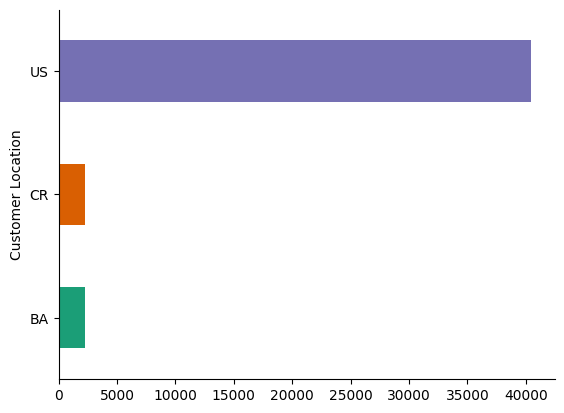

In [ ]:
# @title Customer Location

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Customer Location').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

<ipython-input-116-8da0a93574a8>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='sentiment', y='Customer Location', inner='box', palette='Dark2')


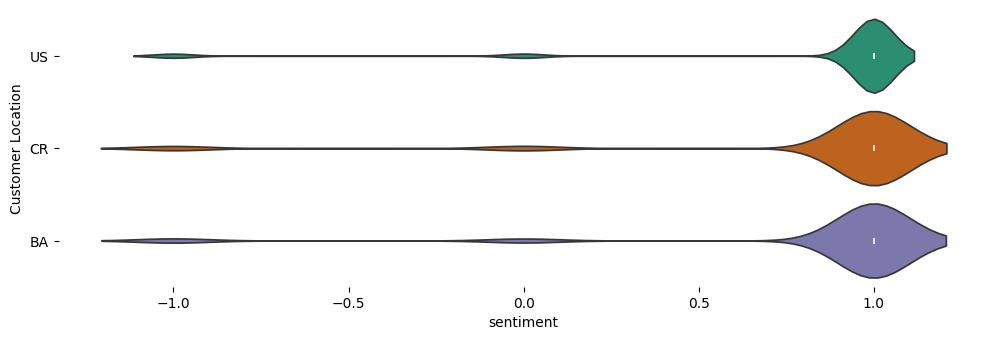

In [ ]:
# @title Customer Location vs sentiment

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Customer Location'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='sentiment', y='Customer Location', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

# Conclusion



Through sentiment analysis and topic modeling of insurance company reviews, several key insights have emerged:

1. **Sentiment Trends:**
   - Positive sentiment prevails across most reviews, but negative sentiment is notable in topics related to policy and communication concerns.
   
2. **Identified Topics:**
   - Customer service, pricing, claims process, and policy clarity are prominent themes identified through topic modeling.
   
3. **Sentiment Distribution:**
   - Negative sentiment is particularly prevalent in reviews discussing policy and communication issues, indicating areas for improvement.
   
4. **Recommendations:**
   - Improve customer service: Address policy and communication concerns highlighted in negative sentiment reviews.
   - Enhance product offerings: Tailor products/services based on identified topics to better meet customer needs.
   - Optimize marketing strategies: Leveraging sentiment and topic insights allows for targeted marketing efforts and improved customer engagement.
   
These strategies empower insurance companies to refine their offerings and marketing approaches, resulting in enhanced customer satisfaction and business success.
